# Image Classification with Neural Networks

Statistical Methods for Machine Learning - AA 2019/2020

Università degli Studi di Milano

Gerard Baholli 943594

## Setup

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.3.0


In [ ]:
import pathlib

data_dir = pathlib.Path("/content/drive/My Drive/Colab Notebooks/dataset2")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

32369


## Preprocessing

### Create a dataset

In [ ]:
batch_size = 64
img_height = 32
img_width = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 32369 files belonging to 10 classes.
Using 25896 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 32369 files belonging to 10 classes.
Using 6473 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple', 'Banana', 'Cherry', 'Grape', 'Peach', 'Pear', 'Pepper', 'Plum', 'Potato', 'Tomato']


### Configure the dataset for performance

Let's make sure to use buffered prefetching so we can yield data from disk without having I/O become blocking.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Defs

In [ ]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

num_classes = 10
n_epochs = 20

In [ ]:
# PLOT FUNCTION OF THE MODEL
def plt_history(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(n_epochs)

  plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  return plt.show()

## Model 1

### Training 1

In [ ]:
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(15, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 39s 96ms/step - loss: 2.0249 - accuracy: 0.2668 - val_loss: 1.9300 - val_accuracy: 0.2858
Epoch 2/20
405/405 [==============================] - 1s 2ms/step - loss: 1.8869 - accuracy: 0.3070 - val_loss: 1.8296 - val_accuracy: 0.3212
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 1.8087 - accuracy: 0.3361 - val_loss: 1.7638 - val_accuracy: 0.3646
Epoch 4/20
405/405 [==============================] - 1s 2ms/step - loss: 1.7529 - accuracy: 0.3594 - val_loss: 1.7132 - val_accuracy: 0.3722
Epoch 5/20
405/405 [==============================] - 1s 2ms/step - loss: 1.7100 - accuracy: 0.3723 - val_loss: 1.6755 - val_accuracy: 0.3814
Epoch 6/20
405/405 [==============================] - 1s 2ms/step - loss: 1.6767 - accuracy: 0.3838 - val_loss: 1.6461 - val_accuracy: 0.3936
Epoch 7/20
405/405 [==============================] - 1s 2ms/step - loss: 1.6492 - accuracy: 0.3913 - val_loss: 1.6235 - val_accuracy: 0.3997
Epoc

In [ ]:
model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_61 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_142 (Dense)            (None, 15)                46095     
_________________________________________________________________
dense_143 (Dense)            (None, 10)                160       
Total params: 46,255
Trainable params: 46,255
Non-trainable params: 0
_________________________________________________________________


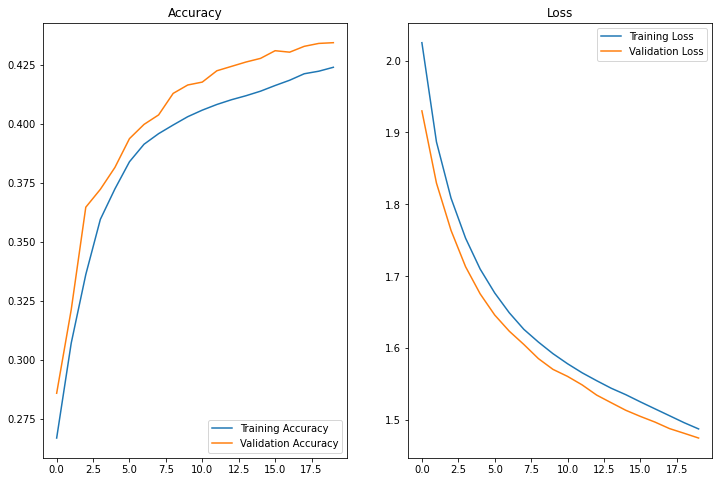

In [ ]:
plt_history(history)

In [ ]:
evaluation = model.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 1.4749 - accuracy: 0.4343


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation[1])

Loss (zero-one-loss):  0.5657345950603485


### Training 2

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 1.4798 - accuracy: 0.4242 - val_loss: 1.4666 - val_accuracy: 0.4344
Epoch 2/20
405/405 [==============================] - 1s 2ms/step - loss: 1.4729 - accuracy: 0.4250 - val_loss: 1.4597 - val_accuracy: 0.4355
Epoch 3/20
405/405 [==============================] - 1s 2ms/step - loss: 1.4674 - accuracy: 0.4254 - val_loss: 1.4539 - val_accuracy: 0.4357
Epoch 4/20
405/405 [==============================] - 1s 2ms/step - loss: 1.4614 - accuracy: 0.4265 - val_loss: 1.4474 - val_accuracy: 0.4350
Epoch 5/20
405/405 [==============================] - 1s 2ms/step - loss: 1.4554 - accuracy: 0.4325 - val_loss: 1.4419 - val_accuracy: 0.4377
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 1.4506 - accuracy: 0.4344 - val_loss: 1.4369 - val_accuracy: 0.4392
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 1.4445 - accuracy: 0.4374 - val_loss: 1.4310 - val_accuracy: 0.4428
Epoch 

In [ ]:
evaluation = model.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 1.3825 - accuracy: 0.4642


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation[1])

Loss (zero-one-loss):  0.5357639491558075


## Model 2

### Training 1

In [ ]:
model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(1, kernel_size=(5, 5), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(15, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 1.5608 - accuracy: 0.4569 - val_loss: 1.1002 - val_accuracy: 0.6295
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.9809 - accuracy: 0.6727 - val_loss: 0.8540 - val_accuracy: 0.7147
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 0.8262 - accuracy: 0.7293 - val_loss: 0.7448 - val_accuracy: 0.7530
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.7366 - accuracy: 0.7585 - val_loss: 0.6795 - val_accuracy: 0.7734
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.6702 - accuracy: 0.7818 - val_loss: 0.6356 - val_accuracy: 0.7919
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.6189 - accuracy: 0.7982 - val_loss: 0.5977 - val_accuracy: 0.8041
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.5770 - accuracy: 0.8118 - val_loss: 0.5737 - val_accuracy: 0.8092
Epoch 

In [ ]:
model2.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_62 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 1)         76        
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 16, 16, 1)         0         
_________________________________________________________________
flatten_56 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 15)                3855      
_________________________________________________________________
dense_145 (Dense)            (None, 10)                160       
Total params: 4,091
Trainable params: 4,091
Non-trainable params: 0
___________________________________________________

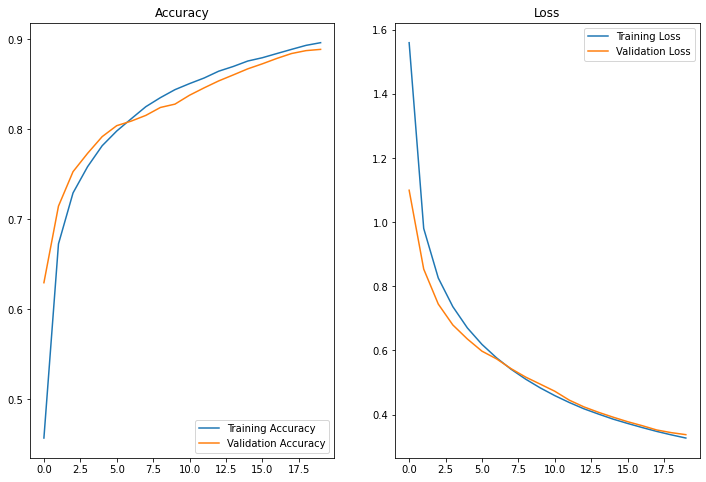

In [ ]:
plt_history(history2)

Evaluation 1:

In [ ]:
evaluation2 = model2.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8889


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation2[1])

Loss (zero-one-loss):  0.11107677221298218


### Training 2

In [ ]:
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.8990 - val_loss: 0.3283 - val_accuracy: 0.8926
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.3094 - accuracy: 0.9015 - val_loss: 0.3223 - val_accuracy: 0.8946
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.9034 - val_loss: 0.3137 - val_accuracy: 0.8974
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.9060 - val_loss: 0.3081 - val_accuracy: 0.9004
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.2873 - accuracy: 0.9081 - val_loss: 0.3020 - val_accuracy: 0.9019
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.9102 - val_loss: 0.2968 - val_accuracy: 0.9041
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.9122 - val_loss: 0.2909 - val_accuracy: 0.9072
Epoch 

Evaluation 2:

In [ ]:
evaluation2 = model2.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9269


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation2[1])

Loss (zero-one-loss):  0.07307279109954834


## Model 3

### Training 1

In [ ]:
model3 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(1, kernel_size=(7, 7), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(15, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history3 = model3.fit(
  train_ds,
  validation_data = val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 1.4240 - accuracy: 0.5053 - val_loss: 0.9919 - val_accuracy: 0.6805
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.8867 - accuracy: 0.7005 - val_loss: 0.7299 - val_accuracy: 0.7724
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.7759 - val_loss: 0.5982 - val_accuracy: 0.8137
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.8138 - val_loss: 0.5152 - val_accuracy: 0.8390
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.8386 - val_loss: 0.4558 - val_accuracy: 0.8528
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.4425 - accuracy: 0.8566 - val_loss: 0.4111 - val_accuracy: 0.8668
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8708 - val_loss: 0.3787 - val_accuracy: 0.8744
Epoch 

In [ ]:
model3.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_63 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 1)         148       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 16, 16, 1)         0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 15)                3855      
_________________________________________________________________
dense_147 (Dense)            (None, 10)                160       
Total params: 4,163
Trainable params: 4,163
Non-trainable params: 0
___________________________________________________

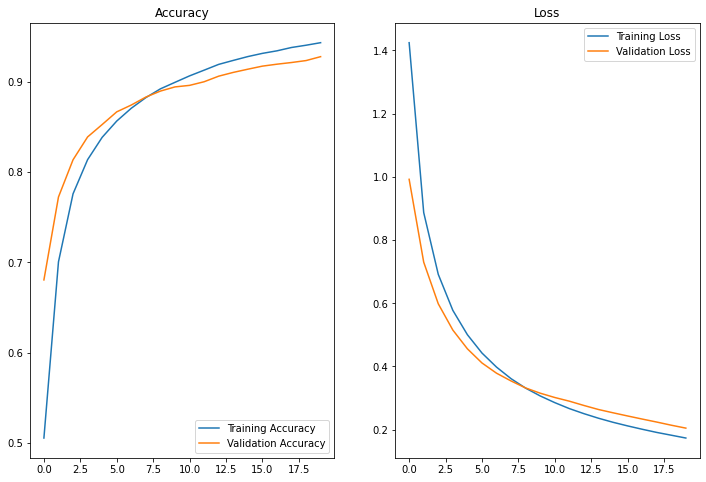

In [ ]:
plt_history(history3)

In [ ]:
evaluation3 = model3.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9280


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation3[1])

Loss (zero-one-loss):  0.07199132442474365


### Training 2

In [ ]:
history3 = model3.fit(
  train_ds,
  validation_data = val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1657 - accuracy: 0.9463 - val_loss: 0.1983 - val_accuracy: 0.9305
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1584 - accuracy: 0.9484 - val_loss: 0.1906 - val_accuracy: 0.9330
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1511 - accuracy: 0.9512 - val_loss: 0.1863 - val_accuracy: 0.9356
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1449 - accuracy: 0.9534 - val_loss: 0.1828 - val_accuracy: 0.9371
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1390 - accuracy: 0.9553 - val_loss: 0.1775 - val_accuracy: 0.9390
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1334 - accuracy: 0.9568 - val_loss: 0.1757 - val_accuracy: 0.9396
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9584 - val_loss: 0.1735 - val_accuracy: 0.9399
Epoch 

In [ ]:
evaluation3 = model3.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9456


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation3[1])

Loss (zero-one-loss):  0.05437970161437988


## Model 4

### Training 1

In [ ]:
model4 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(3, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(15, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model4.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history4 = model4.fit(
  train_ds,
  validation_data = val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 1.4349 - accuracy: 0.5057 - val_loss: 0.9063 - val_accuracy: 0.6981
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.7534 - accuracy: 0.7501 - val_loss: 0.7203 - val_accuracy: 0.7500
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 0.5914 - accuracy: 0.8121 - val_loss: 0.6290 - val_accuracy: 0.7802
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.4939 - accuracy: 0.8476 - val_loss: 0.5389 - val_accuracy: 0.8160
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8716 - val_loss: 0.4726 - val_accuracy: 0.8437
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8912 - val_loss: 0.4159 - val_accuracy: 0.8684
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.9062 - val_loss: 0.3701 - val_accuracy: 0.8878
Epoch 

In [ ]:
model4.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_64 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 3)         84        
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 3)         0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 15)                11535     
_________________________________________________________________
dense_149 (Dense)            (None, 10)                160       
Total params: 11,779
Trainable params: 11,779
Non-trainable params: 0
_________________________________________________

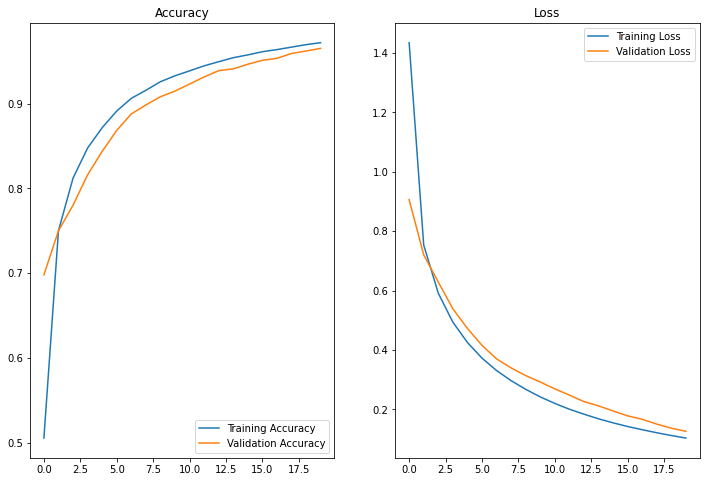

In [ ]:
plt_history(history4)

Evaluation 1:

In [ ]:
evaluation4 = model4.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9651


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation4[1])

Loss (zero-one-loss):  0.034914255142211914


### Training 2

In [ ]:
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9744 - val_loss: 0.1163 - val_accuracy: 0.9685
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.9758 - val_loss: 0.1057 - val_accuracy: 0.9722
Epoch 3/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9774 - val_loss: 0.0969 - val_accuracy: 0.9748
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9785 - val_loss: 0.0905 - val_accuracy: 0.9767
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9799 - val_loss: 0.0843 - val_accuracy: 0.9785
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9809 - val_loss: 0.0794 - val_accuracy: 0.9795
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9821 - val_loss: 0.0758 - val_accuracy: 0.9799
Epoch 

Evaluation 2:

In [ ]:
evaluation4 = model4.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9870


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation4[1])

Loss (zero-one-loss):  0.012977004051208496


## Model 5

### Training 1

In [ ]:
model5 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(15, activation = 'relu' ),
  layers.Dense(10, activation = 'relu' ),
  layers.Dense(num_classes)
])

In [ ]:
model5.compile(
    optimizer = 'sgd',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

In [ ]:
history5 = model5.fit(
  train_ds,
  validation_data = val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 1.7942 - accuracy: 0.3694 - val_loss: 1.5220 - val_accuracy: 0.4670
Epoch 2/20
405/405 [==============================] - 1s 2ms/step - loss: 1.2568 - accuracy: 0.5594 - val_loss: 1.2421 - val_accuracy: 0.5727
Epoch 3/20
405/405 [==============================] - 1s 2ms/step - loss: 0.9455 - accuracy: 0.6781 - val_loss: 1.0715 - val_accuracy: 0.6380
Epoch 4/20
405/405 [==============================] - 1s 2ms/step - loss: 0.7724 - accuracy: 0.7359 - val_loss: 0.9782 - val_accuracy: 0.6637
Epoch 5/20
405/405 [==============================] - 1s 2ms/step - loss: 0.6537 - accuracy: 0.7759 - val_loss: 0.7763 - val_accuracy: 0.7244
Epoch 6/20
405/405 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.8169 - val_loss: 0.6305 - val_accuracy: 0.7880
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.4690 - accuracy: 0.8521 - val_loss: 0.4618 - val_accuracy: 0.8511
Epoch 

In [ ]:
model5.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_65 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_59 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_150 (Dense)            (None, 15)                46095     
_________________________________________________________________
dense_151 (Dense)            (None, 10)                160       
_________________________________________________________________
dense_152 (Dense)            (None, 10)                110       
Total params: 46,365
Trainable params: 46,365
Non-trainable params: 0
_________________________________________________________________


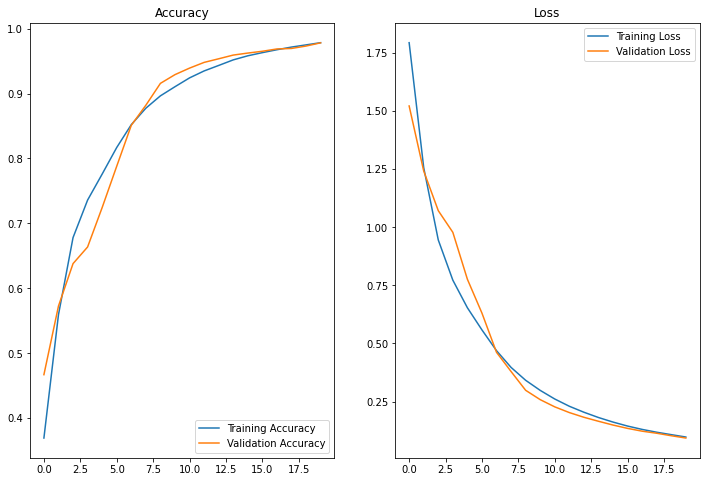

In [ ]:
plt_history(history5)

In [ ]:
evaluation5 = model5.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9781


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation5[1])

Loss (zero-one-loss):  0.021937251091003418


### Training 2

In [ ]:
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs = n_epochs
)

Epoch 1/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9805 - val_loss: 0.0853 - val_accuracy: 0.9810
Epoch 2/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9825 - val_loss: 0.0777 - val_accuracy: 0.9833
Epoch 3/20
405/405 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9845 - val_loss: 0.0712 - val_accuracy: 0.9866
Epoch 4/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9859 - val_loss: 0.0654 - val_accuracy: 0.9876
Epoch 5/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9875 - val_loss: 0.0605 - val_accuracy: 0.9886
Epoch 6/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9886 - val_loss: 0.0564 - val_accuracy: 0.9889
Epoch 7/20
405/405 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9895 - val_loss: 0.0527 - val_accuracy: 0.9895
Epoch 

In [ ]:
evaluation5 = model5.evaluate(val_ds)

102/102 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9958


In [ ]:
print("Loss (zero-one-loss): ", 1-evaluation5[1])

Loss (zero-one-loss):  0.004171192646026611


## RESULTS

In [ ]:
print("Model1: ", evaluation[1]*100)
print("Model2: ", evaluation2[1]*100)
print("Model3: ", evaluation3[1]*100)
print("Model4: ", evaluation4[1]*100)
print("Model5: ", evaluation5[1]*100)

Model1:  46.42360508441925
Model2:  92.69272089004517
Model3:  94.56202983856201
Model4:  98.70229959487915
Model5:  99.58288073539734


## Finer control

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

25896
6473


In [ ]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

###  Configure dataset for performance

In [ ]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

### Random prediction

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(val_ds)

i_pred = 1

print(100*np.max(predictions[i_pred]), class_names[np.argmax(predictions[i_pred])])

36.15826368331909 Grape


### Choosen prediction

45% Apple
0% Banana
16% Cherry
0% Grape
12% Peach
2% Pear
6% Pepper
0% Plum
6% Potato
8% Tomato


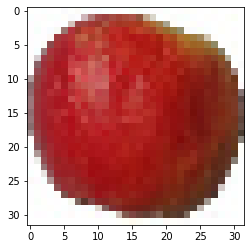

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (img_height, img_width)
batch_size = 32

img = keras.preprocessing.image.load_img(
    pathlib.Path("/content/drive/My Drive/Colab Notebooks/test/17_100.jpg"),
    target_size=image_size
)

plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = probability_model.predict(img_array)
score = predictions[0]

for i in range(10):
  print(str(int(100*score[i])) + "%", class_names[i])